In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.backends.backend_pdf
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xlrd
import seaborn as sns
usa = gpd.read_file('maps/USA_States/USA_States.shp')
usa = usa[(usa['STATE_ABBR'] != 'AK') & (usa['STATE_ABBR'] != 'HI')]
workbook = '/Users/rpsmithii/Dropbox/Hedge Trackers/marketing/data/AFPfiltered201007.xlsx'
worksheet = 'filtered'
df = pd.read_excel(workbook, sheet_name = worksheet)
df = df.rename(columns={'State': 'STATE_ABBR'})
n = df.shape[0]
#df.info()
n

587

In [109]:
box = 'Filtered by\n- practioners only\n- less than $20B in revenue\n- treasury or controller functions\n- VP, DIR, Oficer Level Only\n- customers and inflight optys removed\nn = ' + str(n)
bbox_props = dict(boxstyle = "round", fc = "w", ec = "0.25", alpha = 0.0)
ax.set_title(title, fontsize = '20')
ax.set_xlabel(xlabel, fontsize = '18', labelpad = 0)
ax.set_ylabel(ylabel, fontsize = '18', labelpad = 0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
ax.set_alpha(0.0)



<Figure size 432x288 with 0 Axes>

In [94]:
ind_df = df['Industry'].value_counts(dropna=True, sort=True)
ind_df = pd.DataFrame(ind_df)
ind_df = ind_df.reset_index()
ind_df.columns = ['Industry', 'Attendees']
# ind_df.info()

levl_df = df['Level'].value_counts(dropna=True, sort=True)
levl_df = pd.DataFrame(levl_df)
levl_df = levl_df.reset_index()
levl_df.columns = ['Level', 'Attendees']
# levl_df.info()

dept_df = df['Department'].value_counts(dropna=True, sort=True)
dept_df = pd.DataFrame(dept_df)
dept_df = dept_df.reset_index()
dept_df.columns = ['Department', 'Attendees']
#dept_df.info()

rev_df = df['Revenue'].value_counts(dropna=True, sort=True)
rev_df = pd.DataFrame(rev_df)
rev_df = rev_df.reset_index()
rev_df.columns = ['Revenue', 'Attendees']
#dept_df.info()

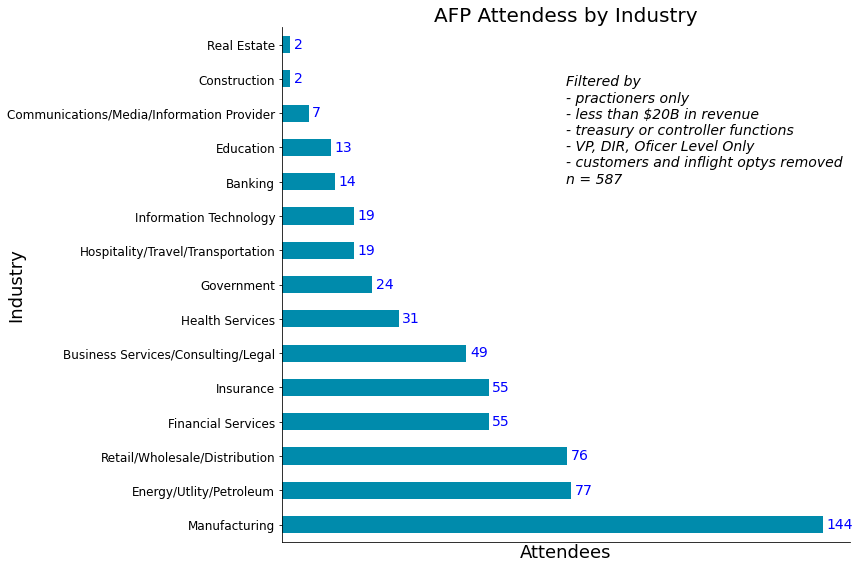

In [92]:
# BY INDUSTRY

title = 'AFP Attendess by Industry'
xlabel = 'Attendees'
ylabel = ('Industry')

ax = ind_df.plot.barh(x='Industry', 
                       y='Attendees',
                       rot = 0,
                       legend = False,
                       fontsize = '16',
                       figsize=(12,8),
                       color= '#008bac')

ax.set_alpha(0.0)
ax.set_title(title, fontsize = '20')
ax.set_xlabel(xlabel, fontsize = '18', labelpad = 1)
ax.set_ylabel(ylabel, fontsize = '18', labelpad = -18)
ax.set_yticklabels(ind_df['Industry'],fontsize = '12', wrap = True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

ax.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False) 

ax.text(0.5, 0.8, box, fontsize = '14', style = 'italic', horizontalalignment = 'left', verticalalignment = 'center', transform = ax.transAxes, bbox = bbox_props)

for i, v in enumerate(ind_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontsize = '14')

plt.tight_layout()

ax.figure.savefig('afp_Industry.png', dpi=96, transparent=True)


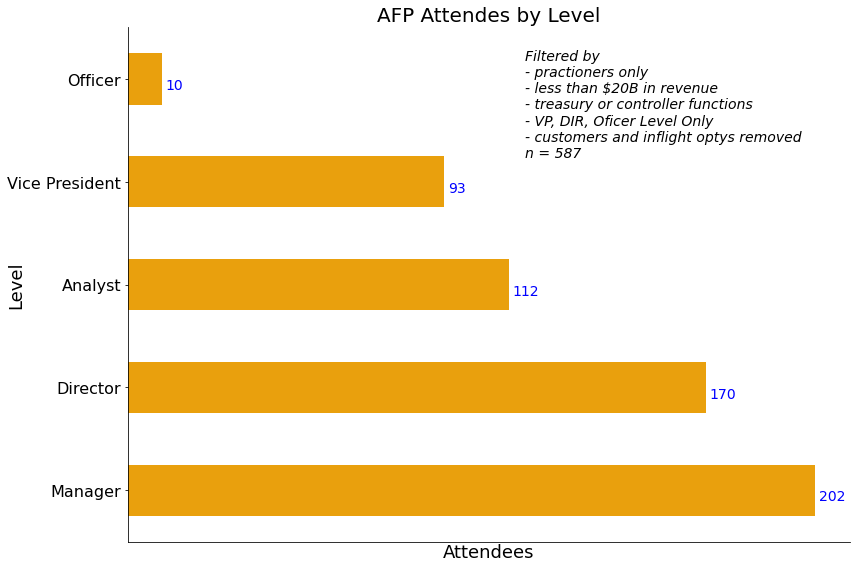

In [61]:
# BY LEVEL
title = 'AFP Attendes by Level'
xlabel = 'Attendees'
ylabel = 'Level'

ax = levl_df.plot.barh(x='Level', y='Attendees', rot = 0, legend = False, fontsize = '16', figsize=(12,8), color= '#e9a00d')

ax.set_title(title, fontsize = '20')
ax.set_xlabel(xlabel, fontsize = '18', labelpad = 1)
ax.set_ylabel(ylabel, fontsize = '18', labelpad = -18)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.set_alpha(0.0)
ax.tick_params(
            axis = 'x',          # changes apply to the x-axis
            which = 'both',      # both major and minor ticks are affected
            bottom = False,      # ticks along the bottom edge are off
            top = False,         # ticks along the top edge are off
            labelbottom = False
     )

bbox_props = dict(boxstyle = "round", fc = "w", ec = "0.25", alpha = 0.0)

ax.text(0.55, 0.85, box, fontsize = '14', 
                       style = 'italic', 
                       horizontalalignment = 'left', 
                       verticalalignment = 'center', 
                       transform = ax.transAxes, 
                       bbox = bbox_props)

for i, v in enumerate(levl_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontsize = '14')

plt.tight_layout()

ax.figure.savefig('afp_Level.png', dpi=96, transparent=True)

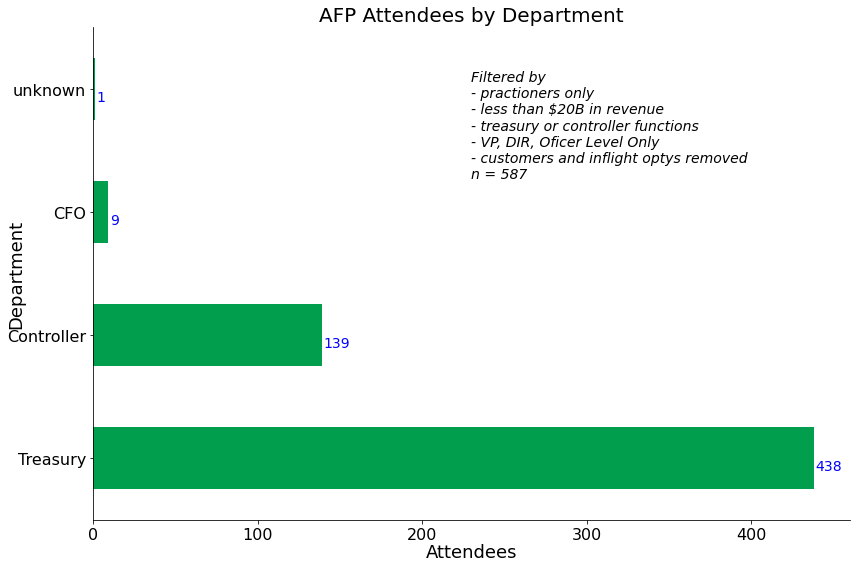

In [115]:
# BY DEPARTMENT
title = 'AFP Attendees by Department'
xlabel = 'Attendees'
ylabel = 'Department'
ax = dept_df.plot.barh(x='Department', y='Attendees', rot = 0, legend = False, fontsize = '16', figsize=(12,8), color = '#009e4d')
for i, v in enumerate(dept_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '14')
ax.set_title(title, fontsize = '20')
ax.set_xlabel(xlabel, fontsize = '18', labelpad = 1)
ax.set_ylabel(ylabel, fontsize = '18', labelpad = -18)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.text(0.50, 0.80, box, fontsize = '14', style = 'italic', horizontalalignment = 'left',  verticalalignment = 'center', transform = ax.transAxes, bbox = bbox_props)
plt.tight_layout()
ax.figure.savefig('afp_Department.png', dpi=96, transparent=True)

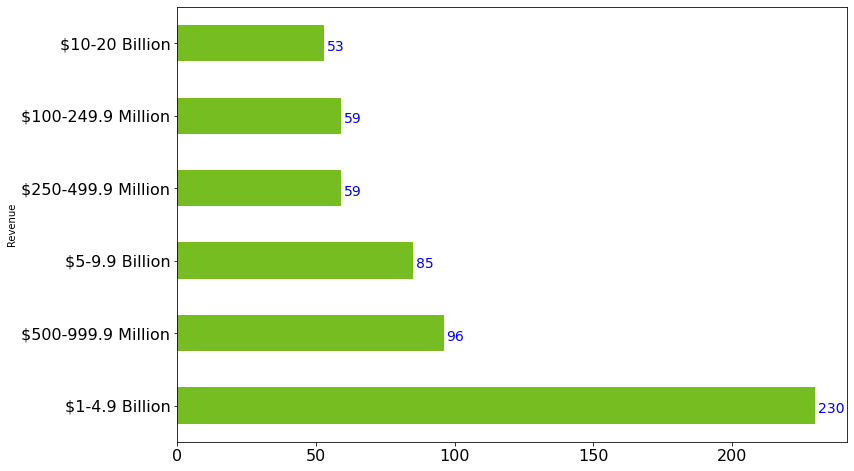

In [102]:
# BY REVENUE
title = 'AFP Attendees by Company Revenue'
xlabel = 'Attendees'
ylabel = 'Revenue'
ax = rev_df.plot.barh(x='Revenue', y='Attendees', rot = 0, legend = False, fontsize = '16', figsize=(12,8), color = '#76BD22')

for i, v in enumerate(rev_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '14')

ax.figure.savefig('afp_Revenue.png', dpi=96, transparent=True)

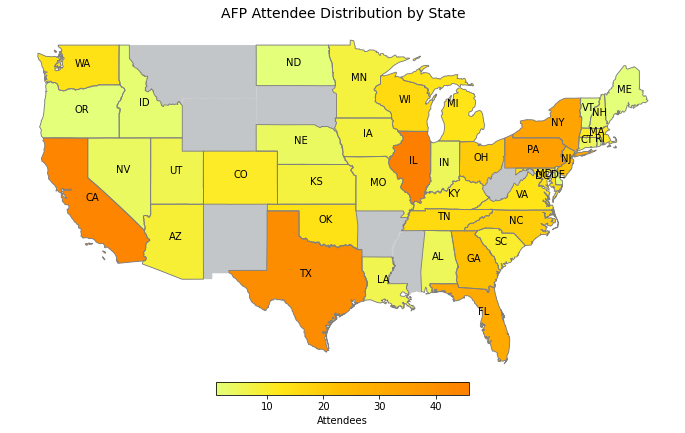

In [66]:
# ATTENDEE STATE DISTRIBUTION

value_counts = df['STATE_ABBR'].value_counts(dropna = False, sort = True)
state_df = pd.DataFrame(value_counts)
state_df = state_df.reset_index()
state_df.columns = ['STATE_ABBR', 'Attendees']
state_df.head(2)

# Add Attendees / State to Geo df
usa_gdf = usa.merge(state_df, on='STATE_ABBR')
usa_gdf.head(2)

title = 'AFP Attendee Distribution by State'
fig, ax = plt.subplots(1, figsize=(12,8))
ax.set_axis_off()
plt.tight_layout()
ax.set_title(title, size = '14', fontweight = '1')
divider = make_axes_locatable(ax)
usa.plot(ax = ax, color='#c2c6c9')
usa_gdf.apply(lambda x: ax.annotate(s=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize = 10, color = 'black'), axis=1)
usa_gdf.plot(column = 'Attendees', cmap='Wistia', ax = ax, legend = True, legend_kwds={'shrink': 0.3, 'label': 'Attendees', 'orientation': 'horizontal', 'pad': -0.2})
usa_gdf.boundary.plot(ax=ax, color='gray', linewidth=.9)

ax.figure.savefig('afp_usa.png', dpi=96, transparent=True)